## Final Project Submission

Please fill out:
* Student name: Andrew Levinton
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Joe Comeaux
* Blog post URL:


## Importing libraries

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [273]:
cd zippedData

[WinError 2] The system cannot find the file specified: 'zippedData'
C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_1\Phase_1_Project\dsc-phase-1-project-v2-4\zippedData


In [244]:
ls

 Volume in drive C is Windows
 Volume Serial Number is A24A-7E70

 Directory of C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_1\Phase_1_Project\dsc-phase-1-project-v2-4\zippedData

11/20/2022  10:50 PM    <DIR>          .
11/21/2022  08:30 PM    <DIR>          ..
11/04/2022  04:23 PM    <DIR>          .ipynb_checkpoints
11/21/2022  03:57 PM            33,800 Bar Chart Rev vs Rating.jpeg
11/21/2022  03:58 PM            51,361 Bar_chart_month_profit.jpeg
10/30/2022  01:11 PM            53,544 bom.movie_gross.csv.gz
11/09/2022  05:01 PM                 0 im.db
11/21/2022  03:57 PM            84,429 Revenue by Genre.jpeg
11/20/2022  12:08 PM            13,276 Revenue by Genre.png
11/21/2022  03:58 PM            56,647 Revenue by Month.jpeg
10/30/2022  01:11 PM           498,202 rt.movie_info.tsv.gz
10/30/2022  01:11 PM         3,402,194 rt.reviews.tsv.gz
11/20/2022  08:36 PM            91,795 Scatter Plot Budget vs Revenue.jpeg
11/20/2022  01:05 PM      

In [274]:
tmdb = pd.read_csv('tmdb.movies.csv.gz')
bom = pd.read_csv('bom.movie_gross.csv.gz')
rt_reviews = pd.read_csv('rt.reviews.tsv.gz', sep='\t',encoding=('ISO-8859-1'),low_memory =False)
rt_info = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')
budgets = pd.read_csv('tn.movie_budgets.csv.gz')

## Which Movie Rating Attracts the Most Revenue?

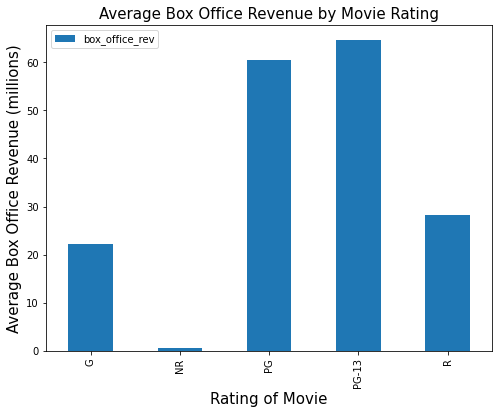

In [275]:
rating_movie = rt.groupby('rating_y')['box_office'].mean().reset_index()
rating_movie['box_office_rev'] = rating_movie['box_office'] / 1000000
rating_movie.plot(x='rating_y',y='box_office_rev',kind='bar',figsize=(8,6))
plt.ylabel('Average Box Office Revenue (millions)',size=15)
plt.xlabel('Rating of Movie',size=15)
plt.title('Average Box Office Revenue by Movie Rating',size=15)
plt.savefig('Bar Chart Rev vs Rating.jpeg')

## Getting Rating Data From Rotten Tomatoes

# Cleaning the Review Data

In [276]:
#import review data
rt_reviews = pd.read_csv('rt.reviews.tsv.gz', sep='\t',encoding=('ISO-8859-1'),low_memory =False)

#filter by top critics
rt_reviews = rt_reviews[rt_reviews['top_critic'] == 1]

#change all ratings to a %
rt_reviews['rating'] = rt_reviews['rating'].astype(str)
rt_reviews['rating'] = rt_reviews['rating'].apply(lambda x:\
                                                  '100' if 'A+' in x\
                                                  else '98' if 'A' in x\
                                                  else '95' if 'A-' in x\
                                                  else '88' if 'B+' in x\
                                                  else '85' if 'B' in x\
                                                  else '80' if 'B-' in x\
                                                  else '78' if 'C+' in x\
                                                  else '75' if 'C' in x\
                                                  else '70' if 'C-' in x\
                                                  else '68' if 'D+' in x\
                                                  else '65' if 'D' in x\
                                                  else '60' if 'D-' in x\
                                                  else '50' if 'F' in x\
                                                  else '45' if 'N' in x\
                                                  else '40' if 'R' in x else x)

rt_reviews['rating'] = rt_reviews['rating'].str.split('/').apply(lambda x: (float(x[0]) / float(x[1])) * 100\
                                                  if (len(x) > 1 and float(x[1]) != 0)\
                                                  else float(x[0]))
rt_reviews['rating'] = rt_reviews['rating'].apply(lambda x: 100 if x > 100 else x)
rt_reviews = rt_reviews.sort_values('rating', ascending=False)


## Merging Tomato Data

In [277]:
rt = pd.merge(rt_reviews,rt_info,on='id')
rt = rt[rt['rating_x'].notnull()]
rt = rt[rt['box_office'].notnull()]
rt['box_office'] = rt['box_office'].str.replace(',','').apply(lambda x: int(x))
rt['genre'] = rt['genre'].str.split('|')

## What are the top 10 directors in terms of box office revenue?

In [278]:
directors = rt[['director','box_office']].drop_duplicates()

directors['director'] = directors['director'].str.split('|')
directors = directors.explode('director')

In [279]:
directors.sort_values('box_office', ascending=False).head(10)

,director,box_office
191,Mel Gibson,368000000
5441,Peter Jackson,303001229
2274,Sam Mendes,299300000
8843,Jay Roach,279167575
238,Chris Columbus,261835892
3978,Joel Zwick,241250669
0,Steven Spielberg,234141872
4075,Peter Berg,227946274
5025,Justin Lin,209805005
5676,Andy Tennant,177575142


## Getting Genre Data

In [280]:
genre = rt.explode('genre')
genre = genre.rename(columns={'box_office':'box_office_revenue'})
genre = genre.rename(columns={'rating_x':'rating'})

## Box Office Revenue by Genre

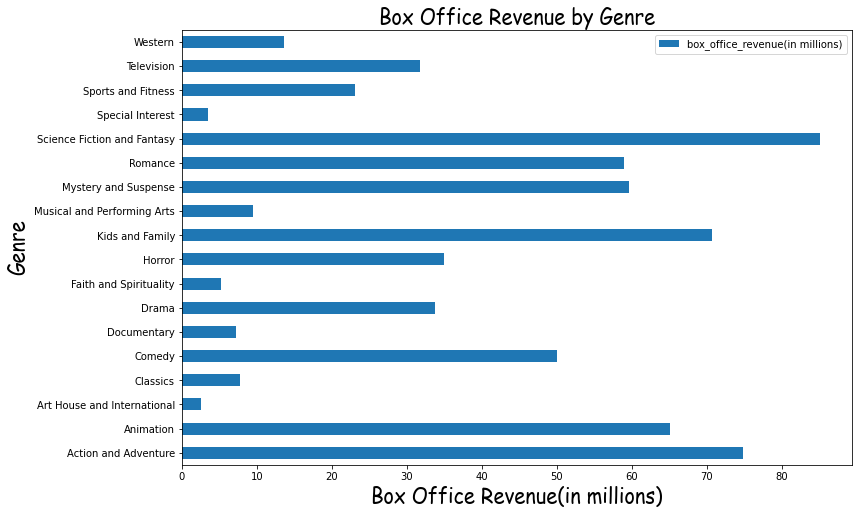

In [281]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
genre_revenue = genre.groupby('genre')['box_office_revenue'].mean().reset_index()
genre_revenue['box_office_revenue(in millions)'] = genre_revenue['box_office_revenue'] / 1000000
genre_revenue.plot(x='genre',y='box_office_revenue(in millions)',kind='barh',figsize=(12,8))
plt.title('Box Office Revenue by Genre', size=20, **csfont)
plt.xlabel('Box Office Revenue(in millions)',size=20, **csfont)
plt.ylabel('Genre',size=20,**csfont)
# plt.show()
plt.savefig("Revenue by Genre.jpeg",bbox_inches='tight') #save as jpg

## Average Rating by Genre -(probably leave out)

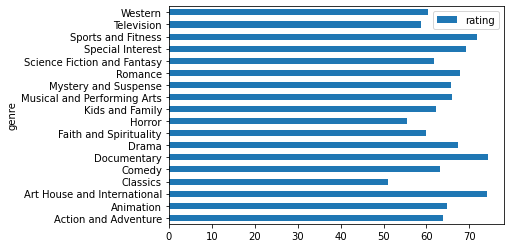

In [282]:
genre_rating = genre.groupby('genre')['rating'].mean().reset_index()
ax = genre_rating.plot(x='genre',y='rating',kind='barh')
plt.show()

## Box Office Revenue by month

In [283]:
rt['release_month'] = rt['theater_date'].astype(str).apply(lambda x: x[0:3])

In [284]:
monthly = rt.groupby('release_month')['box_office'].mean().reset_index()

In [285]:
monthly = monthly[0:12]

In [286]:
monthly['release_month'] = monthly['release_month'].apply(lambda x: 'January' if x=='Jan'\
                                                         else 'February' if x=='Feb'\
                                                         else 'March' if x=='Mar'\
                                                         else 'April' if x=='Apr'\
                                                         else 'May' if x=='May'\
                                                         else 'June' if x=='Jun'\
                                                         else 'July' if x=='Jul'\
                                                         else 'August' if x=='Aug'\
                                                         else 'September' if x=='Sep'\
                                                         else 'October' if x=='Oct'\
                                                         else 'November' if x=='Nov'\
                                                         else 'December' if x=='Dec'\
                                                         else x)

In [287]:
monthly['month_no'] = monthly['release_month'].apply(lambda x: 1 if x=='January'\
                                                         else 2 if x=='February'\
                                                         else 3 if x=='March'\
                                                         else 4 if x=='April'\
                                                         else 5 if x=='May'\
                                                         else 6 if x=='June'\
                                                         else 7 if x=='July'\
                                                         else 8 if x=='August'\
                                                         else 9 if x=='September'\
                                                         else 10 if x=='October'\
                                                         else 11 if x=='November'\
                                                         else 12 if x=='December'\
                                                         else x)

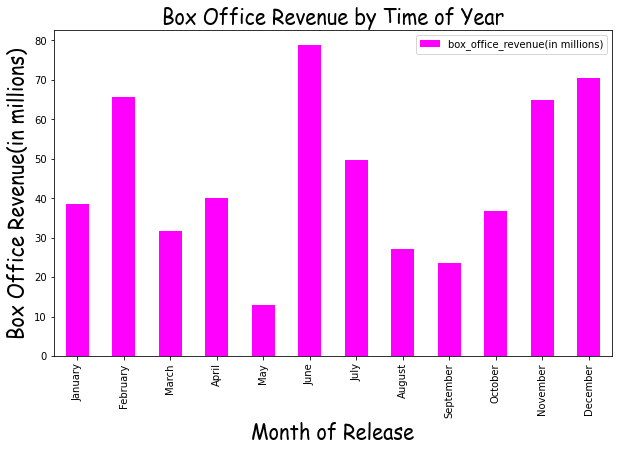

In [288]:
monthly = monthly.sort_values('month_no')
monthly['box_office_revenue(in millions)'] = monthly['box_office'] / 1000000

monthly.plot(x='release_month',y='box_office_revenue(in millions)',kind='bar',color='magenta',figsize=(10,6))

plt.title('Box Office Revenue by Time of Year', size=20, **csfont)
plt.ylabel('Box Office Revenue(in millions)',size=20, **csfont)
plt.xlabel('Month of Release',size=20,**csfont)
plt.savefig("Revenue by Month.jpeg",bbox_inches='tight') #save as jpg

## Using Budgets Dataframe to check profit

In [262]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [293]:
budgets = pd.read_csv('tn.movie_budgets.csv.gz')

budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(',','').str.replace('$','').apply(lambda x: float(x))/ 1000000000
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(',','').str.replace('$','').apply(lambda x: float(x)) / 1000000000
budgets['total_gross'] = budgets['domestic_gross'] + budgets['worldwide_gross']

merge = pd.merge(tmdb,budgets,left_on='title', right_on='movie')
merge = merge[['title','vote_count','popularity','production_budget','domestic_gross','worldwide_gross','total_gross']]
merge['production_budget'] = merge['production_budget'].str.replace('$','').str.replace(',','').astype(int)
merge = merge.sort_values('production_budget', ascending=False)


merge['budget'] = merge['production_budget'] / 1000000000
merge['profit'] = (merge['total_gross'] - merge['budget']).round(2)
merge = merge.sort_values('vote_count')

# plt.figure()
# ax = merge.plot(x='vote_count',y='profit')
# ax.set_ylabel('profit(in billions)')
# plt.show()




In [264]:
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.700,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.700,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.800,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.900,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.300,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.000,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.000,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.000,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.000,1


In [294]:
budgets = pd.read_csv('tn.movie_budgets.csv.gz')

budgets['domestic_gross'] = budgets['domestic_gross'].str.replace("$","").str.replace(",","").astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace("$","").str.replace(",","").astype(float)
budgets['production_budget'] = budgets['production_budget'].str.replace("$","").str.replace(",","").astype(float)
budgets['total_gross'] = budgets['domestic_gross'] + budgets['worldwide_gross']
budgets['profit(in billions)'] = (budgets['total_gross'] - budgets['production_budget']) / 1000000000
budgets['month'] = budgets['release_date'].apply(lambda x: x[0:3])
budgets['year'] = budgets['release_date'].apply(lambda x: x[-4:])
budgets['month'] = budgets['month'].apply(lambda x: 'January' if x=='Jan'\
                                                         else 'February' if x=='Feb'\
                                                         else 'March' if x=='Mar'\
                                                         else 'April' if x=='Apr'\
                                                         else 'May' if x=='May'\
                                                         else 'June' if x=='Jun'\
                                                         else 'July' if x=='Jul'\
                                                         else 'August' if x=='Aug'\
                                                         else 'September' if x=='Sep'\
                                                         else 'October' if x=='Oct'\
                                                         else 'November' if x=='Nov'\
                                                         else 'December' if x=='Dec'\
                                                         else x)

budgets['budget'] = budgets['production_budget'] / 1000000000
budgets['profit'] = budgets['profit(in billions)']
budgets['total_gross(in millions)'] = budgets['total_gross']  / 1000000

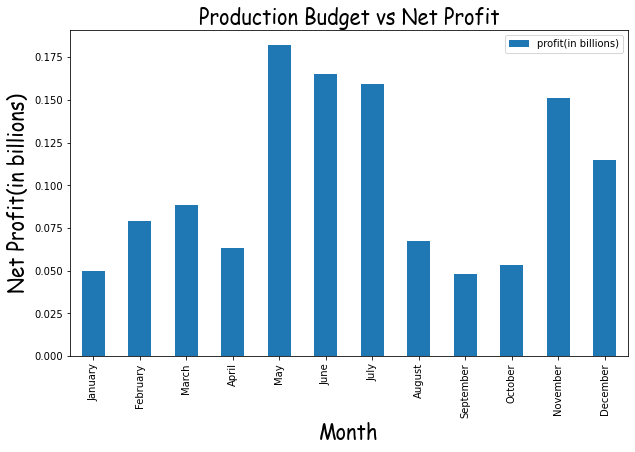

In [295]:
monthly = budgets.groupby('month')['profit(in billions)'].mean().reset_index()
monthly['month_no'] = monthly['month'].apply(lambda x: 1 if x=='January'\
                                                         else 2 if x=='February'\
                                                         else 3 if x=='March'\
                                                         else 4 if x=='April'\
                                                         else 5 if x=='May'\
                                                         else 6 if x=='June'\
                                                         else 7 if x=='July'\
                                                         else 8 if x=='August'\
                                                         else 9 if x=='September'\
                                                         else 10 if x=='October'\
                                                         else 11 if x=='November'\
                                                         else 12 if x=='December'\
                                                         else x)
monthly = monthly.sort_values('month_no')
monthly.plot(x='month',y='profit(in billions)', kind='bar',figsize=(10,6))
plt.title('Production Budget vs Net Profit', size=20, **csfont)
plt.ylabel('Net Profit(in billions)',size=20, **csfont)
plt.xlabel('Month',size=20,**csfont)
plt.savefig("Bar_chart_month_profit.jpeg",bbox_inches='tight') #save as jpg

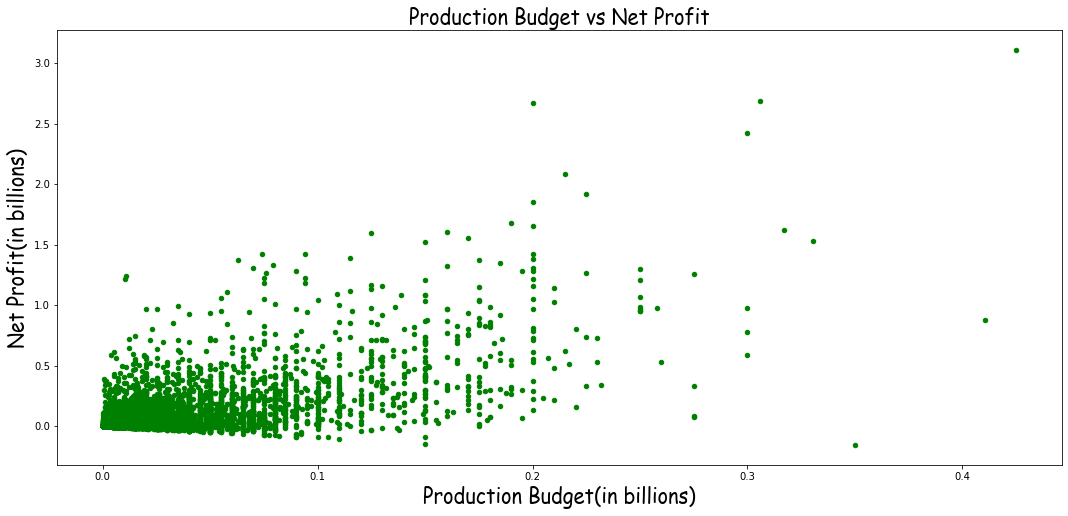

In [296]:
budgets.plot.scatter(x='budget',y='profit',figsize=(18,8), c='green')
plt.title('Production Budget vs Net Profit', size=20, **csfont)
plt.ylabel('Net Profit(in billions)',size=20, **csfont)
plt.xlabel('Production Budget(in billions)',size=20,**csfont)
plt.savefig("Scatter Plot Revenue vs Profit.jpeg",bbox_inches='tight') #save as jpg



In [297]:
## Correlation coefficient - line of regression
budgets['budget'].corr(budgets['profit'])

0.643579874967001

In [299]:
budgets['total gross(billions)'] = budgets['total_gross'] / 1000000000

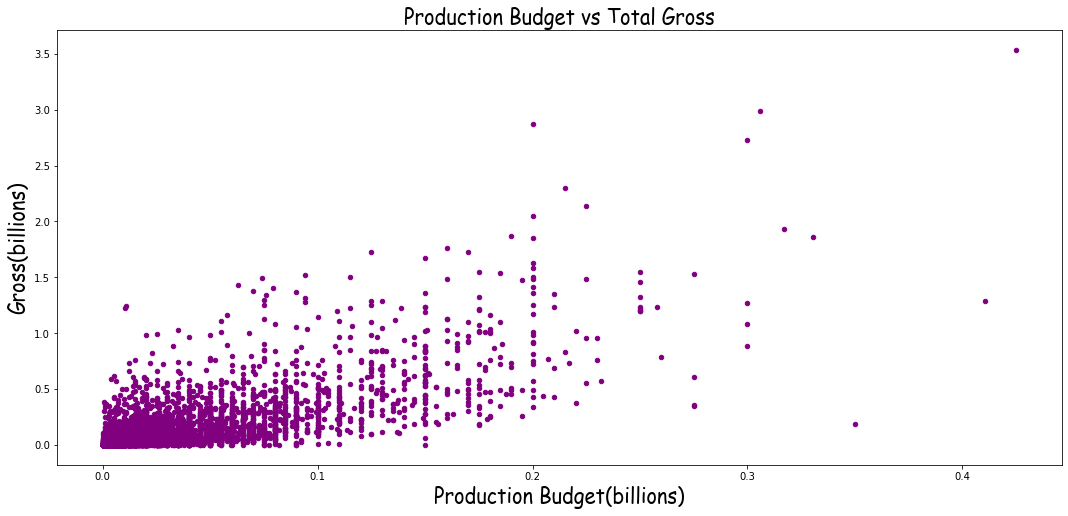

In [300]:
budgets.plot.scatter(x='budget',y='total gross(billions)',figsize=(18,8), c='purple')
plt.title('Production Budget vs Total Gross', size=20, **csfont)
plt.ylabel('Gross(billions)',size=20, **csfont)
plt.xlabel('Production Budget(billions)',size=20,**csfont)
plt.savefig("Scatter Plot Budget vs Revenue.jpeg",bbox_inches='tight') #save as jpg

In [302]:
budgets['budget'].corr(budgets['total gross(billions)'])

0.7399121495609374

In [271]:
yearly = budgets.groupby('year')['profit(in billions)'].mean().reset_index()

yearly = yearly.sort_values('year')
# # bins = [1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
# plt.plot(yearly.year,yearly['total_gross(in millions)'])
# # plt.xticks(bins,rotation='vertical')
# plt.show()

yearly['time_per'] = yearly['year'].astype(int).apply(lambda x: '1910-1919' if x>=1910 and x<=1919\
                                         else '1920-1929' if x>=1920 and x<=1929\
                                         else '1930-1929' if x>=1930 and x<=1939\
                                         else '1920-1929' if x>=1940 and x<=1949\
                                         else '1920-1929' if x>=1950 and x<=1959\
                                         else '1920-1929' if x>=1960 and x<=1969\
                                         else '1920-1929' if x>=1970 and x<=1979\
                                         else '1920-1929' if x>=1980 and x<=1989\
                                         else '1920-1929' if x>=1990 and x<=1999\
                                         else '1920-1929' if x>=2000 and x<=2009\
                                         else '1920-1929' if x>=2010 and x<=2019\
                                         else '1920-1929' if x>=2020 and x<=2029\
                                         else x) 

In [305]:
cd ..

C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_1\Phase_1_Project\dsc-phase-1-project-v2-4


## IMDB data analysis based on genre

Querying the movie_basics and movie_ratings

In [336]:
import sqlite3 as sql

conn = sql.connect('im.db')
df = pd.read_sql('''SELECT * 
                FROM movie_basics
                JOIN movie_ratings
                USING(movie_id)
                JOIN movie_akas
                USING(movie_id)
                ORDER BY numvotes DESC
                ''', conn)



## Merge with budgets dataframe

In [337]:
imdb_budgets = pd.merge(df,budgets,left_on='original_title',right_on='movie',how='inner')


## Checking Profit by Genre

In [330]:
imdb_budgets['genres'] = imdb_budgets['genres'].str.split(',')
imdb_budgets_genres = imdb_budgets.explode('genres')


Text(0.5, 1.0, 'Profit by Genre')

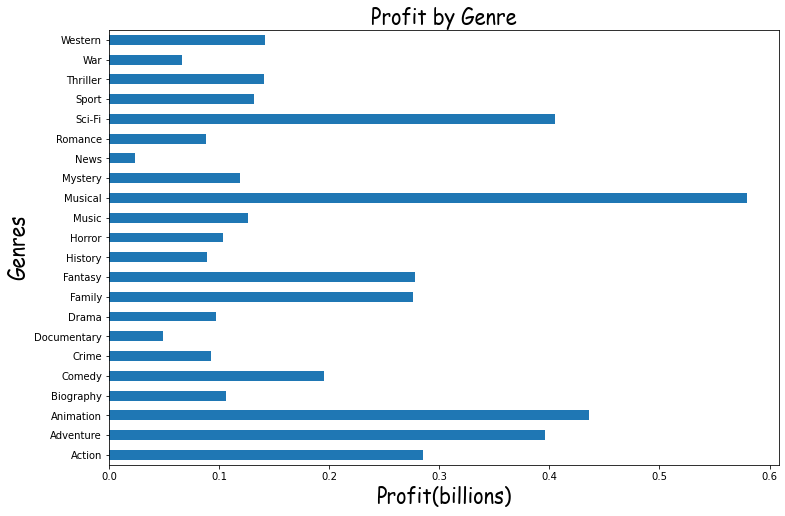

In [335]:
imdb_budgets_genres_by_profit = imdb_budgets.groupby('genres')['profit'].mean()
imdb_budgets_genres_by_profit.plot(x='genres',y='profit',kind='barh',figsize=(12,8))
plt.xlabel('Profit(billions)',size=20,**csfont)
plt.ylabel('Genres',size=20,**csfont)
plt.title('Profit by Genre',size=20,**csfont)

<AxesSubplot:xlabel='averagerating', ylabel='profit'>

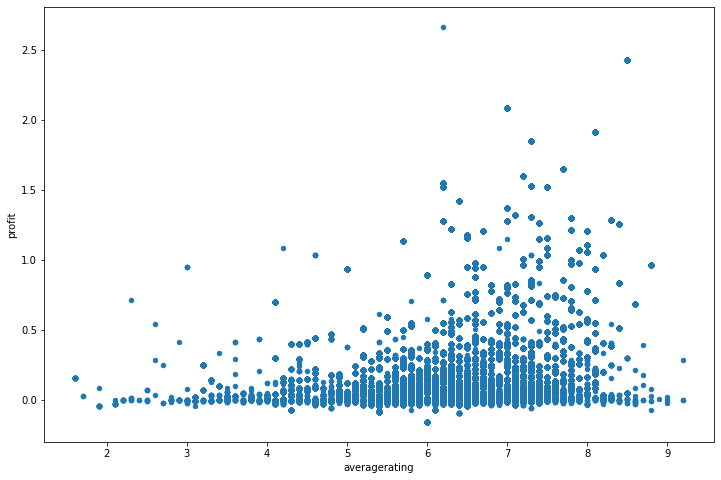

In [340]:
imdb_budgets.plot.scatter(x='averagerating',y='profit',figsize=(12,8))

In [342]:
imdb_budgets['profit'].corr(imdb_budgets['averagerating'])

0.2916811422014202

In [351]:
print(imdb_budgets.columns)

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'ordering',
       'title', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'id', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'total_gross',
       'profit(in billions)', 'month', 'year', 'budget', 'profit',
       'total_gross(in millions)', 'total gross(billions)'],
      dtype='object')
